Que2.-

The model's main purpose is to predict the 10-year risk of Coronary Heart Disease (CHD). CHD is a disease of the blood vessels supplying the heart. Heart disease has been the leading cause of death worldwide since 1921. In 2008, 7.3 million people died from CHD. 
The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Sex: male or female(0=female, 1=male)
Age: Age of the patient
education: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
Current Smoker: whether or not the patient is a current smoker (0=No, 1=Yes)
Cigs Per Day: the number of cigarettes that the person smoked on average in one day
BP Meds: whether or not the patient was on blood pressure medication 
Prevalent Stroke: whether or not the patient had previously had a stroke (0=No, 1=Yes)
Prevalent Hyp: whether or not the patient was hypertensive (0=No, 1=Yes)
Diabetes: whether or not the patient had diabetes (0=No, 1=Yes)
Tot Chol: total cholesterol level
Sys BP: systolic blood pressure 
Dia BP: diastolic blood pressure
BMI: Body Mass Index
Heart Rate: heart rate
Glucose: glucose level

Prepare model by using logistic regression KNN, SVM and Naive Bayes.

Also calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score.

Datasets : framingham.csv


In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("framingham.csv")

In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df['education'] = df['education'].fillna(df['education'].mode())
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode())
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())

In [9]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.316023,-0.052504,-0.004550,0.005853,0.015693,-0.070064,-0.035879,0.058199,0.081705,-0.116913,0.005718,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192534,0.123052,0.057679,0.306799,0.101314,0.260691,0.394053,0.205586,0.135578,-0.012839,0.116951,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008296,-0.010898,-0.035142,-0.081726,-0.038749,-0.023504,-0.129496,-0.061919,-0.137476,-0.054176,-0.034228,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.767055,-0.048927,-0.032980,-0.103710,-0.044285,-0.046211,-0.130281,-0.107933,-0.167483,0.062678,-0.054062,0.019448
cigsPerDay,0.316023,-0.192534,0.008296,0.767055,1.000000,-0.046149,-0.032711,-0.066444,-0.037086,-0.026182,-0.088523,-0.056473,-0.092888,0.075257,-0.056020,0.057646
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046149,1.000000,0.117370,0.261067,0.052060,0.079660,0.254194,0.194122,0.100300,0.015230,0.049079,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.024856,-0.017674,0.018065,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066444,0.261067,0.074791,1.000000,0.077752,0.162683,0.696656,0.615840,0.300599,0.146777,0.082757,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037086,0.052060,0.006955,0.077752,1.000000,0.040161,0.111265,0.050260,0.086282,0.048986,0.605709,0.097344
totChol,-0.070064,0.260691,-0.023504,-0.046211,-0.026182,0.079660,0.000105,0.162683,0.040161,1.000000,0.207436,0.163423,0.115013,0.090678,0.044710,0.081807


# Dropping the columns which are having very less correlation with 'TenYearCHD'

In [10]:
for i in df.columns:
    corr = df['TenYearCHD'].corr(df[i])
    if corr < 0.1:
        df.drop(i,axis = 1,inplace=True)

In [11]:
df.corr()

,age,prevalentHyp,sysBP,diaBP,glucose,TenYearCHD
age,1.000000,0.306799,0.394053,0.205586,0.116951,0.225408
prevalentHyp,0.306799,1.000000,0.696656,0.615840,0.082757,0.177458
sysBP,0.394053,0.696656,1.000000,0.783952,0.134561,0.216374
diaBP,0.205586,0.615840,0.783952,1.000000,0.058499,0.145112
glucose,0.116951,0.082757,0.134561,0.058499,1.000000,0.120451
TenYearCHD,0.225408,0.177458,0.216374,0.145112,0.120451,1.000000


<Axes: >

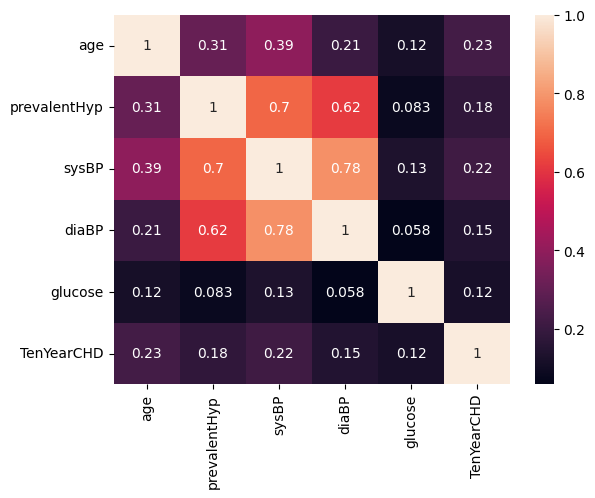

In [12]:
sns.heatmap(df.corr(),annot=True)

# Splitting the data

In [13]:
x = df.drop('TenYearCHD',axis = 1)
y = df['TenYearCHD']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=123456)

# Model building

In [15]:
# Logistic regression
from sklearn.linear_model import LogisticRegressionCV
def create_LogisticReg_model():
    model = LogisticRegressionCV()
    model.fit(x_train,y_train)
    return model

In [16]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
def create_KNN_model():
    model = KNeighborsClassifier()
    model.fit(x_train,y_train)
    return model

In [17]:
# SVM
from sklearn.svm import SVC
def create_SVC_model():
    model = SVC()
    model.fit(x_train,y_train)
    return model

In [18]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
def create_NB_model():
    model = GaussianNB()
    model.fit(x_train,y_train)
    return model

In [19]:
model = []
model.append({'name':'LogisticRegression','model':create_LogisticReg_model()})
model.append({'name':'KNN','model':create_KNN_model()})
model.append({'name':'SVC','model':create_SVC_model()})
model.append({'name':'Naive Bayes','model':create_NB_model()})

In [20]:
def visualize_model(info):
    
    y_pred = info["model"].predict(x_test)
    plt.scatter(x_test['age'][y_pred == 0], x_test['sysBP'][y_pred == 0], color="green", label="NO CHD")
    plt.scatter(x_test['age'][y_pred == 1], x_test['sysBP'][y_pred == 1], color="red", label="CHD")
    plt.xlabel("age")
    plt.ylabel("sysBP")
    plt.title(f"{info['name']} Visualization ")
    plt.legend()

Accuracy for LogisticRegression model: 0.85
Precision for LogisticRegression model: 0.38
Recall for LogisticRegression model: 0.02
F1 score for LogisticRegression model: 0.05
Confusion matrix for LogisticRegression model: [[718   5]
 [122   3]]


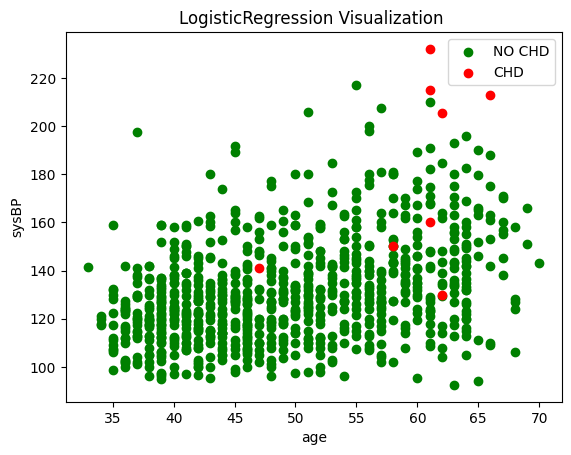

-----------------------------------------------------------------
Accuracy for KNN model: 0.83
Precision for KNN model: 0.33
Recall for KNN model: 0.11
F1 score for KNN model: 0.17
Confusion matrix for KNN model: [[694  29]
 [111  14]]


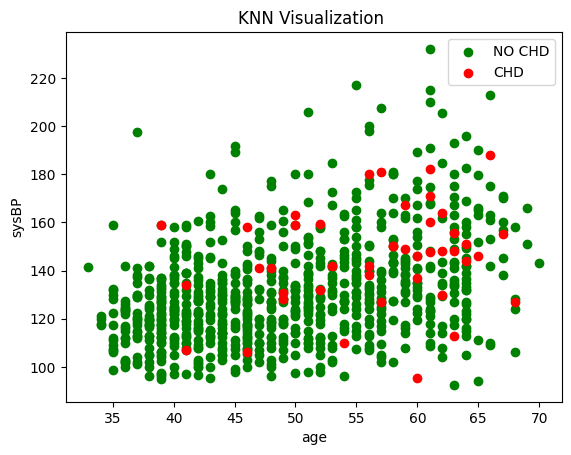

-----------------------------------------------------------------
Accuracy for SVC model: 0.85
Precision for SVC model: 0.43
Recall for SVC model: 0.02
F1 score for SVC model: 0.05
Confusion matrix for SVC model: [[719   4]
 [122   3]]


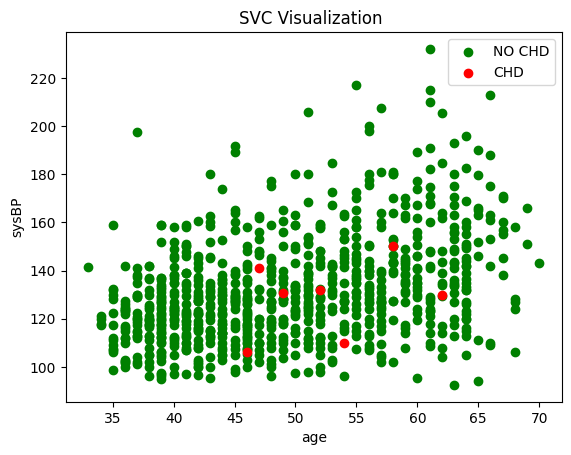

-----------------------------------------------------------------
Accuracy for Naive Bayes model: 0.81
Precision for Naive Bayes model: 0.30
Recall for Naive Bayes model: 0.22
F1 score for Naive Bayes model: 0.25
Confusion matrix for Naive Bayes model: [[661  62]
 [ 98  27]]


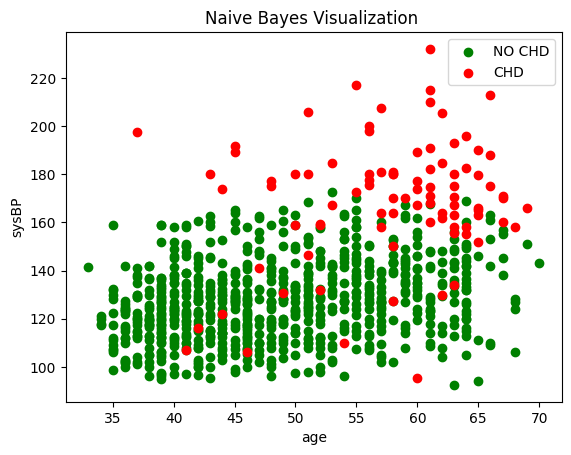

-----------------------------------------------------------------


In [21]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
for i in model:
    y_pred = i['model'].predict(x_test)
    print(f"Accuracy for {i['name']} model: {accuracy_score(y_test,y_pred):.2f}")
    print(f"Precision for {i['name']} model: {precision_score(y_test,y_pred):.2f}")
    print(f"Recall for {i['name']} model: {recall_score(y_test,y_pred):.2f}")
    print(f"F1 score for {i['name']} model: {f1_score(y_test,y_pred):.2f}")
    print(f"Confusion matrix for {i['name']} model: {confusion_matrix(y_test,y_pred)}")
    visualize_model(i)
    plt.show()
    print(65*'-')